# Create new MNIST numbers

We are going to read in numbers from the ./data folder which contains folders for each number in the range 0-9.  Then 100 examples of every number in the range 10-99 will be created by concatenating a pair of numbers (one for 10's and one for 1's) into new images which are 56x56.


In [1]:
import os
import random
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

from glob import glob

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
# define the transformation pipeline
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Ensure the image is grayscale (1 channel)
    #transforms.Resize((28, 28)),  # Resize the image to 28x28 pixels
    transforms.ToTensor(),  # Convert image to PyTorch tensor (values between 0 and 1)
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the image (mean and std dev as in MNIST)
])

In [ ]:


# # iterate over all the images in the folders
# for img_path in glob('./data/*/*'):
#     # load the image
#     img = Image.open(img_path)
#     # apply the transformations
#     img = transforms.ToTensor()(img)
#     # get the mean and std
#     mean = torch.mean(img, dim=[1, 2])
#     std = torch.std(img, dim=[1, 2])
#     # print the results
#     print(f'{img_path}: mean={mean}, std={std}')

#     # plot the image
#     plt.imshow(img.permute(1, 2, 0))
#     plt.show()

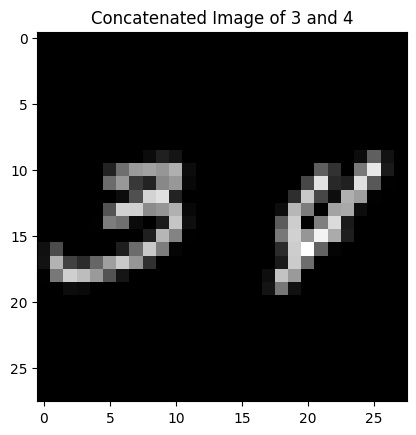

In [3]:



from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Step 1: Define the root directory containing subfolders for each digit (0-9)
root_dir = './data'  # Replace with the path to your dataset

# Function to randomly select an image from a given digit's folder
def get_random_image_for_digit(digit, root_dir):
    # Path to the folder for the given digit
    digit_folder = os.path.join(root_dir, str(digit))
    
    # List all files in the digit folder
    image_files = os.listdir(digit_folder)
    
    # Randomly choose an image file
    random_image_file = random.choice(image_files)
    
    # Load the image using PIL
    image_path = os.path.join(digit_folder, random_image_file)
    image = Image.open(image_path)
    
    return image

# Function to concatenate two images (28x28 each) horizontally into a 28x56 image
def concatenate_images(image1, image2):
    # Ensure both images are 28x28
    transform = transforms.Resize((28, 28))  # Resize to 28x28
    image1 = transform(image1)
    image2 = transform(image2)
    
    # Concatenate the two images horizontally
    image3 = Image.new('L', (56, 28))  # Create a blank image (L mode for grayscale)
    image3.paste(image1, (0, 0))  # Paste image1 at (0, 0)
    image3.paste(image2, (28, 0))  # Paste image2 at (28, 0)

    return image3
    
    

# Function to create a 28x56 image from two random digits
def create_concatenated_image(digit1, digit2, root_dir):
    # Step 2: Get random images for each digit
    img1 = get_random_image_for_digit(digit1, root_dir)
    img2 = get_random_image_for_digit(digit2, root_dir)
    
    # Step 3: Concatenate the images
    concatenated_img = concatenate_images(img1, img2)
    
    return concatenated_img

# Function to impose a 28x56 image centrally onto a black 56x56 background
def impose_on_black_background(concatenated_img):
    # Step 1: Create a black 56x56 image (L mode for grayscale)
    black_background = Image.new('L', (56, 56), color=0)  # 0 means black in grayscale

    # Step 2: Calculate the top-left position to paste the 28x56 image
    # Center the 28x56 image within the 56x56 background
    paste_x = (56 - 56) // 2  # The concatenated image has the same width (56)
    paste_y = (56 - 28) // 2  # Center the height (28px high) vertically in 56px

    # Step 3: Paste the 28x56 image onto the black background at the calculated position
    black_background.paste(concatenated_img, (paste_x, paste_y))

    black_background = black_background.resize((28, 28))

    return black_background

# Example usage: create a concatenated image for digits 3 and 7
digit1 = 3
digit2 = 4
concatenated_img = impose_on_black_background(create_concatenated_image(digit1, digit2, root_dir))

# Step 4: Display the concatenated image
plt.imshow(concatenated_img, cmap='gray')
plt.title(f"Concatenated Image of {digit1} and {digit2}")
plt.show()

# Save the concatenated image (optional)
#concatenated_img.save(f"./concatenated_{digit1}_{digit2}.png")




In [4]:
# create new folders for the concatenated images if they don't exist already create them
for i in range(10):
    for j in range(10):
        if i > 0:
            os.makedirs(f'./data/concatenated/{i}{j}', exist_ok=True)
        else:
            os.makedirs(f'./data/concatenated/{j}', exist_ok=True)


In [5]:
for i in range(10):
    for j in range(10):
        for c in range(1, 101):
            digit1 = i
            digit2 = j
            concatenated_img = impose_on_black_background(create_concatenated_image(digit1, digit2, root_dir))
            #plt.imshow(concatenated_img, cmap='gray')
            #plt.title(f"Concatenated Image of {digit1} and {digit2}")
            #plt.show()
            if digit1 == 0:
                concatenated_img.save(f"./data/concatenated/{digit2}/{c}_{digit2}.png")
            else:
                concatenated_img.save(f"./data/concatenated/{digit1}{digit2}/{c}_{digit1}{digit2}.png")  
            
                

<class 'torch.Tensor'>


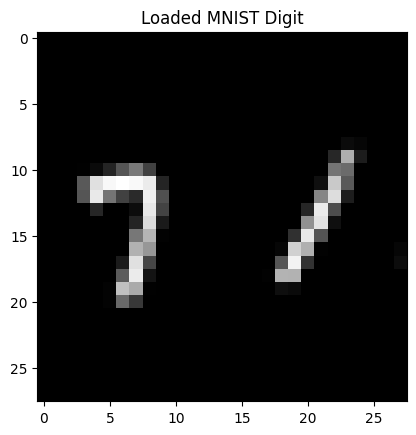

In [6]:
# load the image using PIL
def load_image(img_path):
    img = Image.open(img_path)
    img_tensor = transform(img)
    return img_tensor[0]


img_path = './data/concatenated/71/8_71.png'  # Replace with the path to your image file
i = load_image(img_path)

print(type(i))

# # Step 4: Display the image and its tensor representation
plt.imshow(i, cmap='gray')
plt.title("Loaded MNIST Digit")
plt.show()

# # Step 5: Print the shape of the tensor to ensure correctness (should be [1, 28, 28])
# print(f"Image tensor shape: {i_tensor.shape}")

In [7]:
import os
import shutil
import random

# Define the root directory of your dataset and new directories for training and validation
root_dir = './data/concatenated'  
train_dir = './data/concatenated/train'
validation_dir = './data/concatenated/validation'

# Create the train and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Function to split images for each digit into train and validation sets
def split_data_for_digit(digit, root_dir, train_dir, validation_dir, train_split=0.8):
    # Define the source directory (e.g., './data/0' for digit 0)
    digit_dir = os.path.join(root_dir, str(digit))
    
    # List all image files in the digit's folder
    image_files = os.listdir(digit_dir)
    
    # Shuffle the list of image files to ensure randomness
    random.shuffle(image_files)
    
    # Calculate the split point (80% for training, 20% for validation)
    split_point = int(len(image_files) * train_split)
    
    # Split the images into training and validation sets
    train_files = image_files[:split_point]
    validation_files = image_files[split_point:]
    
    # Create subfolders in train and validation directories for the digit
    train_digit_dir = os.path.join(train_dir, str(digit))
    validation_digit_dir = os.path.join(validation_dir, str(digit))
    os.makedirs(train_digit_dir, exist_ok=True)
    os.makedirs(validation_digit_dir, exist_ok=True)
    
    # Move the images to the respective directories
    for file in train_files:
        shutil.move(os.path.join(digit_dir, file), os.path.join(train_digit_dir, file))
    
    for file in validation_files:
        shutil.move(os.path.join(digit_dir, file), os.path.join(validation_digit_dir, file))

# Split the data for digits 0 through 99
for digit in range(100):
    split_data_for_digit(digit, root_dir, train_dir, validation_dir, train_split=0.8)

print("Data split into training and validation sets successfully!")


Data split into training and validation sets successfully!


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Step 1: Define custom dataset path and data transformations
# Update this to your dataset path
data_dir = './data/concatenated'  # Root directory for the dataset

# Define transformations: Convert to grayscale, resize to 28x28, and normalize
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Ensure it's a single channel (grayscale)
    transforms.Resize((28, 28)),  # Resize all images to 28x28
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and stddev like MNIST
])

# Step 2: Load the custom dataset using ImageFolder
train_dataset = datasets.ImageFolder(root=data_dir + '/train', transform=transform)
test_dataset = datasets.ImageFolder(root=data_dir + '/validation', transform=transform)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

# Step 3: Create DataLoader for training and testing sets
train_loader = DataLoader(train_dataset, batch_size=72, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Step 4: Define the CNN model (same as before)
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # 1 input channel (grayscale), 32 filters
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer (2x2)
        
        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Fully connected layer (after pooling)
        self.fc2 = nn.Linear(128, 100)  # Output layer (100 digits)

    def forward(self, x):
        # Define the forward pass
        x = self.pool(F.relu(self.conv1(x)))  # First conv layer + ReLU + Pooling
        x = self.pool(F.relu(self.conv2(x)))  # Second conv layer + ReLU + Pooling
        
        # Flatten the output from the conv layers
        x = x.view(-1, 64 * 7 * 7)
        
        x = F.relu(self.fc1(x))  # Fully connected layer with ReLU
        x = self.fc2(x)  # Output layer
        return x

# Step 5: Initialize the model, define the loss function and the optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Step 6: Train the model
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            # Track the loss
            running_loss += loss.item()
        
        # Print the average loss for the epoch
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")
    
    print("Finished Training")





# Train the model
train_model(model, train_loader, criterion, optimizer, epochs=50)






Train dataset size: 8000
Test dataset size: 2000
Epoch [1/50], Loss: 3.3459
Epoch [2/50], Loss: 0.9133
Epoch [3/50], Loss: 0.5191
Epoch [4/50], Loss: 0.3579
Epoch [5/50], Loss: 0.2723
Epoch [6/50], Loss: 0.1987
Epoch [7/50], Loss: 0.1529
Epoch [8/50], Loss: 0.1326
Epoch [9/50], Loss: 0.0903
Epoch [10/50], Loss: 0.0899
Epoch [11/50], Loss: 0.0633
Epoch [12/50], Loss: 0.0588
Epoch [13/50], Loss: 0.0297
Epoch [14/50], Loss: 0.0290
Epoch [15/50], Loss: 0.0240
Epoch [16/50], Loss: 0.0425
Epoch [17/50], Loss: 0.0454
Epoch [18/50], Loss: 0.0218
Epoch [19/50], Loss: 0.0271
Epoch [20/50], Loss: 0.0215
Epoch [21/50], Loss: 0.0097
Epoch [22/50], Loss: 0.0070
Epoch [23/50], Loss: 0.0017
Epoch [24/50], Loss: 0.0009
Epoch [25/50], Loss: 0.0008
Epoch [26/50], Loss: 0.0007
Epoch [27/50], Loss: 0.0006
Epoch [28/50], Loss: 0.0005
Epoch [29/50], Loss: 0.0432
Epoch [30/50], Loss: 0.1131
Epoch [31/50], Loss: 0.0575
Epoch [32/50], Loss: 0.0243
Epoch [33/50], Loss: 0.0187
Epoch [34/50], Loss: 0.0168
Epoch [3

In [20]:
# Step 7: Evaluate the model on test data
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to calculate gradients for evaluation
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            print(f"label {labels}")
            print(f"predicted {predicted}")
    
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the test dataset
evaluate_model(model, train_loader)
evaluate_model(model, test_loader)

label tensor([12,  9, 38, 85, 51, 98, 38, 59, 44, 60, 55, 10, 75, 18, 38, 79, 13, 59,
        13,  4, 69, 30, 13, 27, 60, 76, 79, 69, 29, 93,  9, 10, 62,  0, 87, 51,
        56, 60, 37, 81,  1, 87, 53, 14,  4, 90, 30, 86, 79, 78,  6, 96, 18, 73,
        56, 55, 52,  0,  6, 30, 76, 74, 30, 40, 77, 66, 46, 33, 12, 57, 25, 52])
predicted tensor([12,  9, 38, 85, 51, 98, 38, 59, 44, 60, 55, 10, 75, 18, 38, 79, 13, 59,
        13,  4, 69, 30, 13, 27, 60, 76, 79, 69, 29, 93,  9, 10, 62,  0, 87, 51,
        56, 60, 37, 81,  1, 87, 53, 14,  4, 90, 30, 86, 79, 78,  6, 96, 18, 73,
        56, 55, 52,  0,  6, 30, 76, 74, 30, 40, 77, 66, 46, 33, 12, 57, 25, 52])
label tensor([21, 54, 41,  4, 72, 47, 70, 54,  1, 18, 49,  6,  2, 19, 49, 93, 40, 53,
        87, 37, 98, 88, 54, 63, 11, 63, 71, 36,  6, 57, 22, 15, 94, 63, 19, 53,
        46, 41, 97, 90, 93, 61, 53, 65, 53, 34, 49, 68, 56, 54, 43, 57, 47, 49,
        25, 41, 42, 10, 17, 44, 43, 42, 32, 35, 94, 30,  2, 80, 58, 42, 21, 46])
predicted tenso

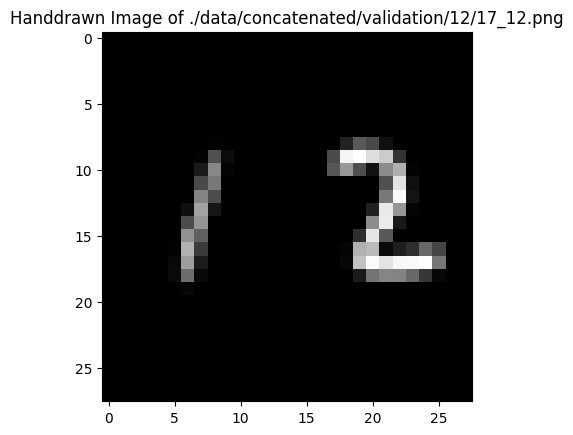

Predicted digit: 4


In [38]:
# Step 8: Function to predict a single digit
def predict_digit(model, img_path):
    # Load and preprocess the image
    img = Image.open(img_path) #.convert('L')  # Convert image to grayscale
    img = transform(img).unsqueeze(0)  # Apply transformations and add batch dimension
    
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        outputs = model(img)
        _, predicted = torch.max(outputs.data, 1)
        
    return predicted.item()

# Example usage: Predict a digit from a custom image file
#img_path = './data/handdrawn/1_27.png'  
img_path = './data/concatenated/validation/12/17_12.png'  # Replace with the path to your image file
img = load_image(img_path)


plt.imshow(img, cmap='gray')
plt.title(f"Handdrawn Image of {img_path}")
plt.show()


predicted_digit = predict_digit(model, img_path)
print(f"Predicted digit: {predicted_digit}")